# Описание выбранного датасета
&nbsp;&nbsp;&nbsp;&nbsp;Выбран датасет: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/

&nbsp;&nbsp;&nbsp;&nbsp;Этот набор данных содержит полный список самых известных песен 2023 года, перечисленных на Spotify. Набор данных дает представление об атрибутах каждой песни, популярности и присутствии на различных музыкальных платформах. 

&nbsp;&nbsp;&nbsp;&nbsp;Атрибуты в датасете:
- track_name: Название песни (строковый тип данных)
- artist(s)_name: Имя исполнителя(ей) песни (строковый тип данных)
- artist_count: Количество исполнителей, участвовавших в создании песни (числовой тип данных)
- released_year: Год, когда песня была выпущена (числовой тип данных)
- released_month: месяц, когда была выпущена песня (числовой тип данных)
- released_day: День месяца, когда была выпущена песня (числовой тип данных)
- in_spotify_playlists: Количество плейлистов Spotify, в которые включена песня (числовой тип данных)
- in_spotify_charts: Присутствие и рейтинг песни в чартах Spotify (числовой тип данных)
- streams: Общее количество прослушиваний на Spotify (числовой тип данных)
- in_apple_playlists: Количество плейлистов Apple Music, в которые включена песня (числовой тип данных)
- in_apple_charts: Присутствие и рейтинг песни в чартах Apple Music (числовой тип данных)
- in_deezer_playlists: Количество плейлистов Deezer, в которые включена песня (числовой тип данных)
- in_deezer_charts: Присутствие и рейтинг песни в чартах Deezer (числовой тип данных)
- in_shazam_charts: Присутствие и рейтинг песни в чартах Shazam (числовой тип данных)
- bpm: количество ударов в минуту, показатель темпа песни (числовой тип данных)
- key: тональность песни (строковый тип данных)
- mode: Режим песни (мажорный или минорный) (строковый тип данных)
- danceability_%: Процент, указывающий, насколько песня подходит для танцев (числовой тип данных)
- valence_%: Позитивность музыкального содержания песни (числовой тип данных)
- energy_%: Воспринимаемый уровень энергии песни (числовой тип данных)
- acousticness_%: Количество акустического звука в песне (числовой тип данных)
- instrumentalness_%: Количество инструментального контента в песне (числовой тип данных)
- liveness_%: Наличие элементов живого исполнения (числовой тип данных)
- speechiness_%: Количество произнесенных слов в песне (числовой тип данных)


# Для начала приведём данные к удобному формату для их дальнейшего анализа

## Удаление нулевых значений

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Загрузка данных
df=pd.read_csv('C:/Users/ASUS/Desktop/UNI/5sem/spotify-2023.csv', encoding='latin-1',on_bad_lines="skip", sep=";")
df=df.drop("key", axis='columns')

# пропушенные значения в колонке'in_shazam_charts' заменяем на 0
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

df = df.drop_duplicates()  # Удаление дубликатов
df = df.dropna()  # Удаление строк с пропущенными значениями

# приводим данные к нужному формату
# переводим значения в столбцах in_deezer_playlist, streams и in_shazam_charts в тип string
df[['in_deezer_playlists', 'in_shazam_charts', 'streams']] = df[['in_deezer_playlists', 'in_shazam_charts', 'streams']].astype('str').astype('string')
# заменяем ',' на пробел, чтобы можно было перевести данные в тип int
df['in_deezer_playlists'] = df['in_deezer_playlists'].replace(',', '', regex=True)
df['in_shazam_charts'] = df['in_shazam_charts'].replace(',', '', regex=True)
# переводим данные из типа string в тип int/int64
df[['in_deezer_playlists', 'in_shazam_charts', 'streams']] = df[['in_deezer_playlists', 'in_shazam_charts', 'streams']].astype(np.int64)
df[['in_deezer_playlists', 'in_spotify_playlists', 'in_apple_playlists']] = df[['in_deezer_playlists', 'in_spotify_playlists', 'in_apple_playlists']].astype(int)

# проверяем, что не осталось нулевых значений
print(df.isnull().sum())

df.head()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,826,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,382,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,949,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,548,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,425,144,Minor,65,23,80,14,63,11,6


## Введём дополнительный атрибут
&nbsp;&nbsp;&nbsp;&nbsp;Введём дополнительный атрибут *count_in_playlist*, в котором будет храниться число вхождений песни во все плейлисты (Spotify, Apple Music, Deezer) вместе взятые. Исходя из значения данного атрибута можно будет судить о степени популярности песни (чем больше прослушиваний, тем популярнее песня).

In [41]:
# Добавление нового атрибута
summ = 0
count_pl = []
for i in range (len(df)):
    summ = df['in_deezer_playlists'][i] + df['in_spotify_playlists'][i]  + df['in_apple_playlists'][i] 
    count_pl.append(summ)

df['count_in_playlist'] = count_pl
df.head()



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,count_in_playlist
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,Major,80,89,83,31,0,8,4,641
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,Major,71,61,74,7,0,10,4,1580
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,Major,51,32,53,17,0,31,6,1582
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,Major,55,58,72,11,0,11,15,8099
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,Minor,65,23,80,14,63,11,6,3304


## Избавимся от столбцов, которые не понядобятся при анализе данных

&nbsp;&nbsp;&nbsp;&nbsp;Во-первых, удалим столбцы *in_spotify_playlists*, *in_apple_playlists*, *in_deezer_playlists*, так как информация из них уже объединена и представлена в столбце *count_in_playlist*.

&nbsp;&nbsp;&nbsp;&nbsp;Исходя из того, что датасет содержит самые новые музыкальные композиции - я не планирую использовать дату создания музыкальной композиции в анализе данных, так как эта информация кажется мне не релевантной. Сдедовательно столбцы *released_year*, *released_month* и *released_day* могут быть удалены.

&nbsp;&nbsp;&nbsp;&nbsp;Аналогичная ситуация с атрибутами, содержащими информацию о позиции песни в чарте. Я считаю эти данные не существенными, так как в датасете представлены самые популярные композиции, следовательно, все они занимают достаточно высокие места в топах.

&nbsp;&nbsp;&nbsp;&nbsp;Также удалим атрибут *mode* - это единственный строковый атрибут, описывающий звуковые характеристики музыкальной композиции, потому что он будет мешать при анализе данных из-за своего типа.

In [42]:
df=df.drop("in_spotify_playlists", axis='columns')
df=df.drop("in_apple_playlists", axis='columns')
df=df.drop("in_deezer_playlists", axis='columns')
df=df.drop("in_shazam_charts", axis='columns')
df=df.drop("in_apple_charts", axis='columns')
df=df.drop("in_spotify_charts", axis='columns')
df=df.drop("in_deezer_charts", axis='columns')
df=df.drop("released_year", axis='columns')
df=df.drop("released_month", axis='columns')
df=df.drop("released_day", axis='columns')
df=df.drop("mode", axis='columns')
df.head()


,track_name,artist(s)_name,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,count_in_playlist
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,141381703,125,80,89,83,31,0,8,4,641
1,LALA,Myke Towers,1,133716286,92,71,61,74,7,0,10,4,1580
2,vampire,Olivia Rodrigo,1,140003974,138,51,32,53,17,0,31,6,1582
3,Cruel Summer,Taylor Swift,1,800840817,170,55,58,72,11,0,11,15,8099
4,WHERE SHE GOES,Bad Bunny,1,303236322,144,65,23,80,14,63,11,6,3304


## Избавимся от выбросов

In [43]:
pd.set_option('mode.chained_assignment', None)
print("Кол-во строк и столбцов: ", df.shape)
Columns=['streams','bpm','danceability_%','valence_%','energy_%','acousticness_%','liveness_%']
for col in Columns:
    print("\nВыбросы в ", col)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    print("Нижнее значение", lower)
    print("Верхнее значение", upper)
    index_for_del = []
    for i in range (len(df)):
        if df[col][i]>=upper or df[col][i]<=lower:
            print("Название: ",df['track_name'][i], "Исполнитель: ",df['artist(s)_name'][i], "Столбец: ",col, "Выброс: ", df[col][i])
            df[col][i] = None
df = df.dropna()  # Удаление строк с пропущенными значениями
print("\n\nКол-во строк и столбцов: ", df.shape)


Кол-во строк и столбцов:  (931, 13)

Выбросы в  streams
Нижнее значение -654627348.25
Верхнее значение 1479954793.75
Название:  As It Was Исполнитель:  Harry Styles Столбец:  streams Выброс:  2513188493
Название:  Sunflower - Spider-Man: Into the Spider-Verse Исполнитель:  Post Malone, Swae Lee Столбец:  streams Выброс:  2808096550.0
Название:  Die For You Исполнитель:  The Weeknd Столбец:  streams Выброс:  1647990401.0
Название:  Starboy Исполнитель:  The Weeknd, Daft Punk Столбец:  streams Выброс:  2565529693.0
Название:  Another Love Исполнитель:  Tom Odell Столбец:  streams Выброс:  1813673666.0
Название:  Blinding Lights Исполнитель:  The Weeknd Столбец:  streams Выброс:  3703895074.0
Название:  Yellow Исполнитель:  Chris Molitor Столбец:  streams Выброс:  1755214421.0
Название:  Heat Waves Исполнитель:  Glass Animals Столбец:  streams Выброс:  2557975762.0
Название:  Sweater Weather Исполнитель:  The Neighbourhood Столбец:  streams Выброс:  2282771485.0
Название:  Viva La Vida Ис

## Построим графики зависимости одной переменной от другой

Найдём коффициенты корелляции между параметрами

In [44]:
import seaborn as sns
import warnings
# отключаем предупреждения
warnings.filterwarnings("ignore")

data_new = df
data_new = data_new.drop("track_name", axis='columns')
data_new = data_new.drop("artist(s)_name", axis='columns')

data_new.corr()


,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,count_in_playlist
artist_count,1.000000,-0.117364,-0.059667,0.235923,0.138360,0.161820,-0.112813,-0.078798,0.051679,0.125424,-0.050923
streams,-0.117364,1.000000,-0.000887,-0.068449,-0.067965,-0.008393,-0.047836,-0.016434,-0.003187,-0.089104,0.686435
bpm,-0.059667,-0.000887,1.000000,-0.125381,0.040612,0.014481,-0.036277,-0.004553,0.001365,0.049261,-0.041423
danceability_%,0.235923,-0.068449,-0.125381,1.000000,0.389553,0.192181,-0.209759,-0.126218,-0.071767,0.187586,-0.021497
valence_%,0.138360,-0.067965,0.040612,0.389553,1.000000,0.354013,-0.072827,-0.150454,0.045925,0.022666,0.008470
energy_%,0.161820,-0.008393,0.014481,0.192181,0.354013,1.000000,-0.559330,-0.020927,0.061423,-0.023579,0.047704
acousticness_%,-0.112813,-0.047836,-0.036277,-0.209759,-0.072827,-0.559330,1.000000,0.034236,-0.040789,-0.037634,-0.085317
instrumentalness_%,-0.078798,-0.016434,-0.004553,-0.126218,-0.150454,-0.020927,0.034236,1.000000,-0.051048,-0.091420,-0.005344
liveness_%,0.051679,-0.003187,0.001365,-0.071767,0.045925,0.061423,-0.040789,-0.051048,1.000000,-0.023782,-0.035851
speechiness_%,0.125424,-0.089104,0.049261,0.187586,0.022666,-0.023579,-0.037634,-0.091420,-0.023782,1.000000,-0.051416


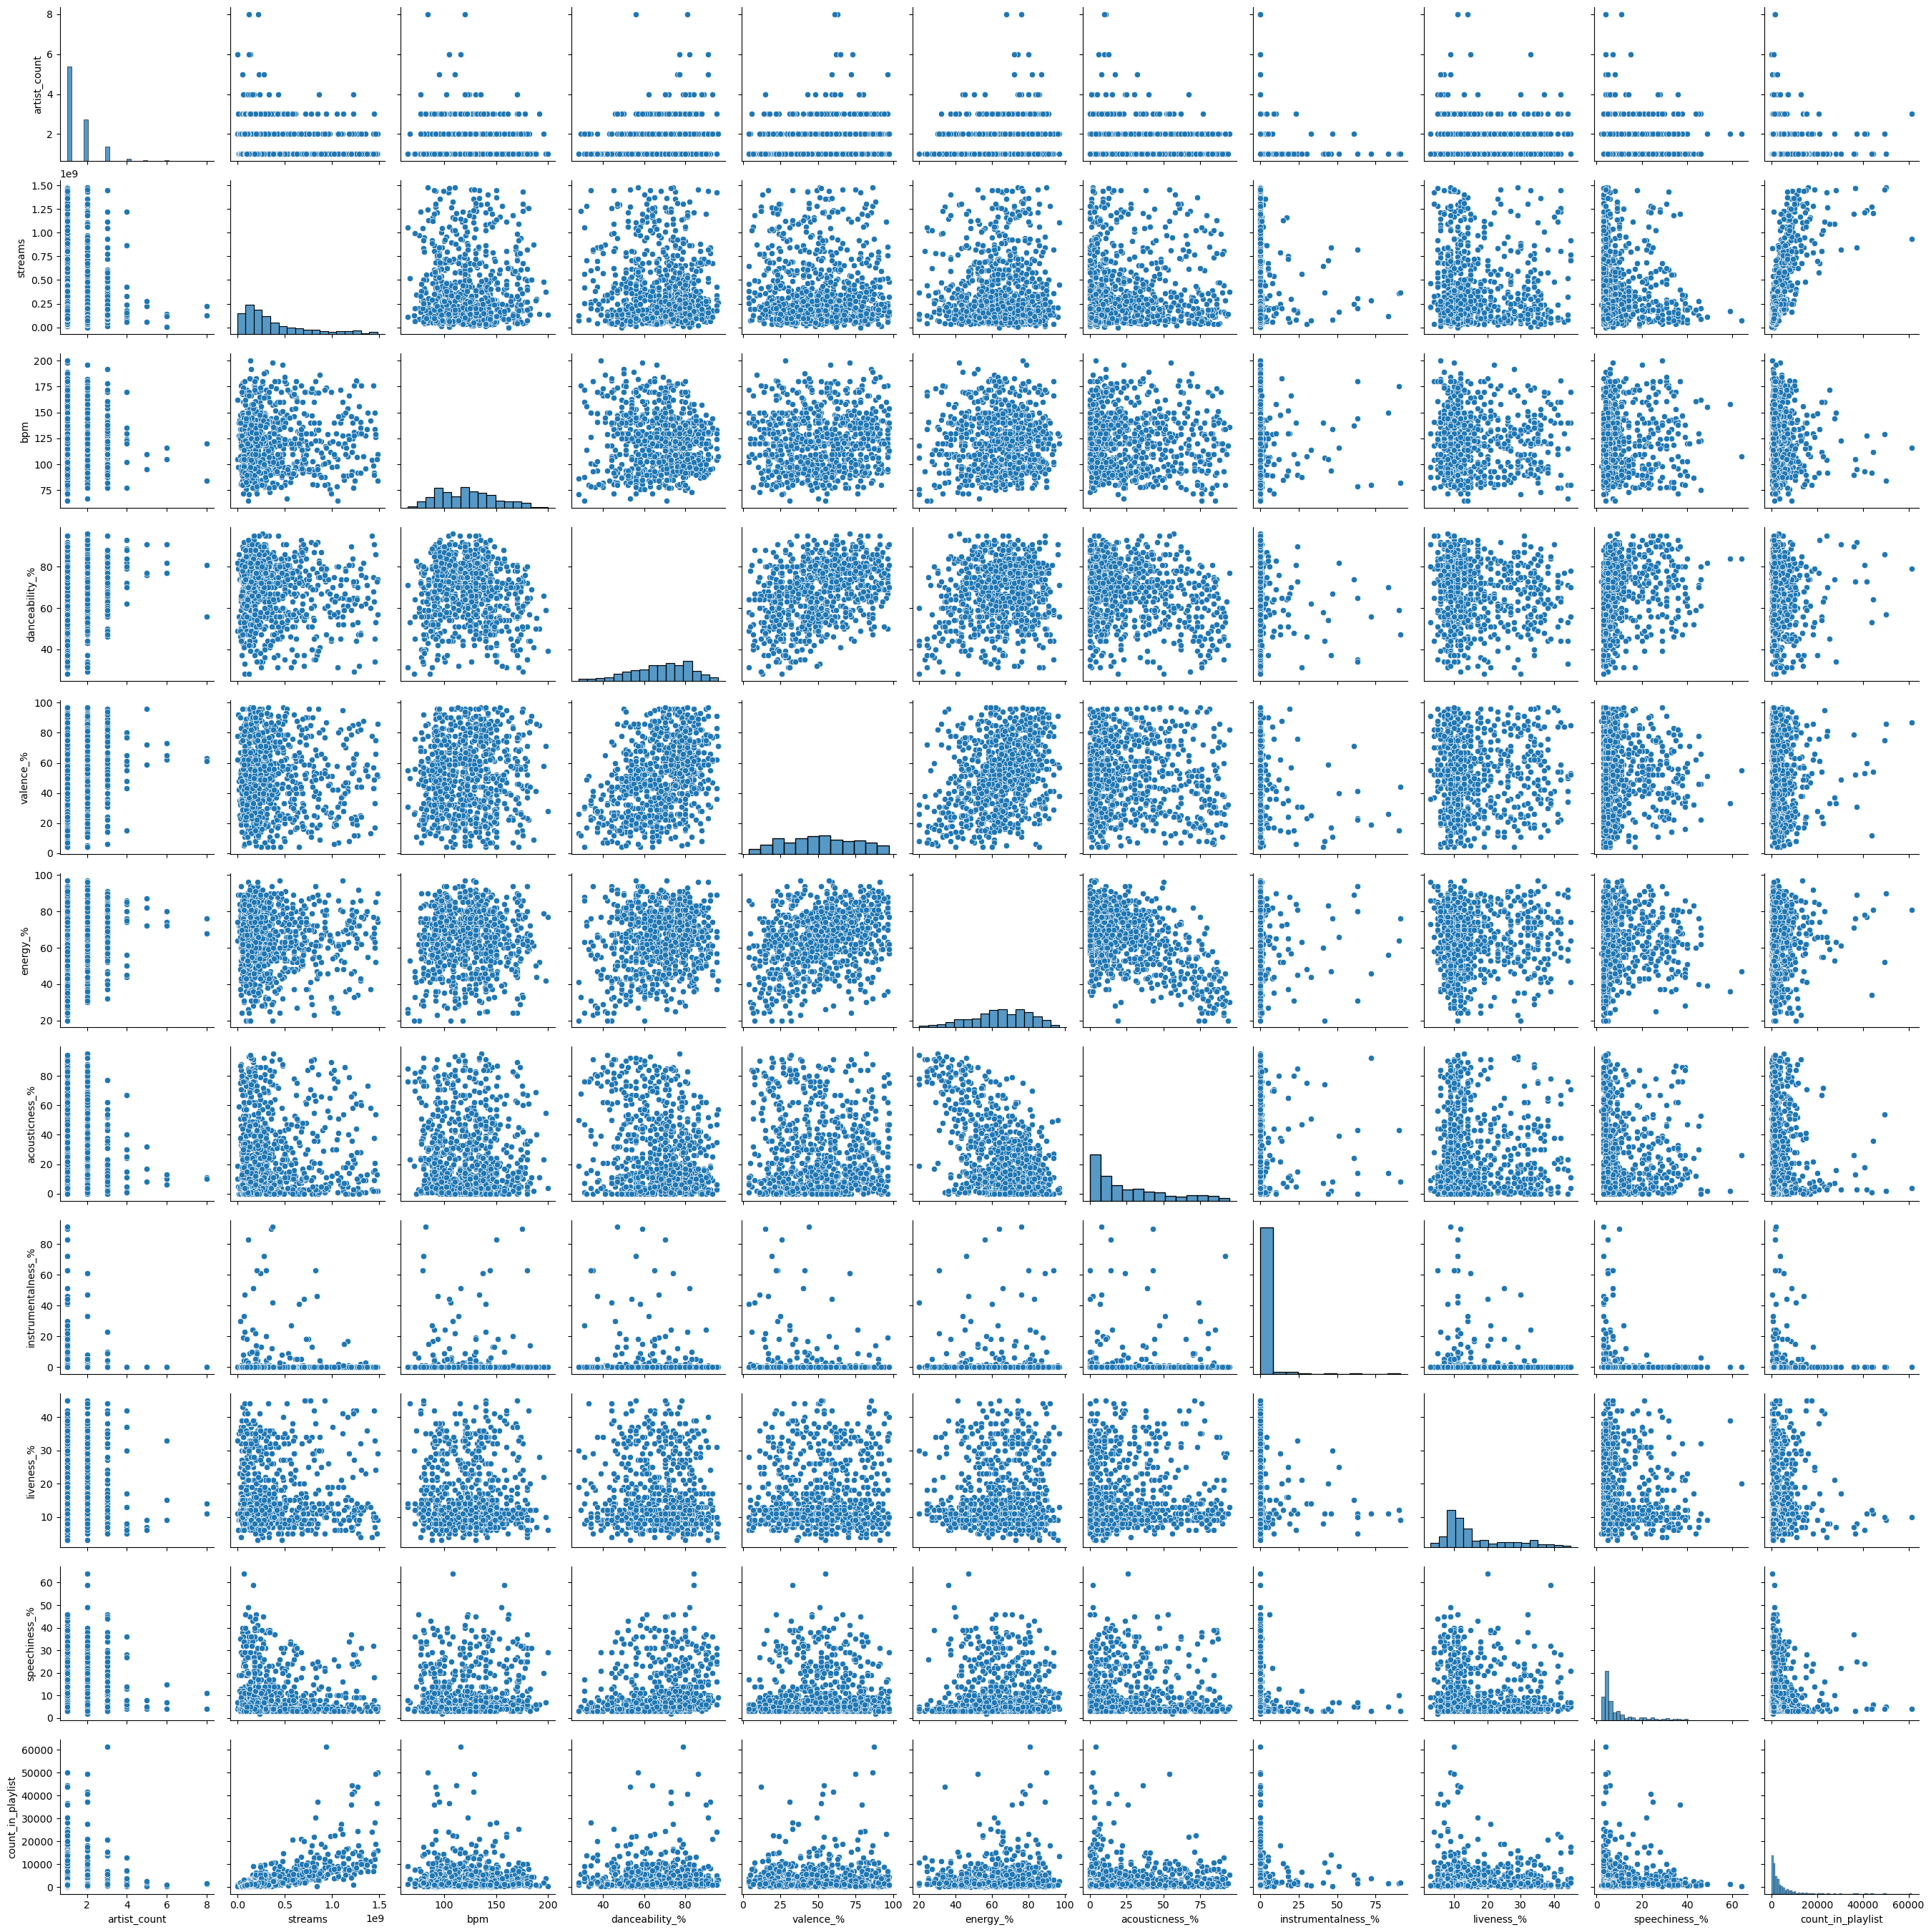

In [21]:
# строим матрицу графиков рассеивания
sns.pairplot(data_new)
plt.show()

Анализирую коэффициенты корреляции и графики рассеивания можно сделать вывод, что между атрибутами нет сильной взаимосвязи.

Самый большой коэффициент корреляции равный 0.686435 между атрибутами *count_in_playlist* (количество вхождений в плейлисты) и *streams* (количество прослушиваний) легко объясним и логичен.

На втором месте по величине коэффициент корреляции равный 0.389553 у связи *danceability* (процент, указывающий, насколько песня подходит для танцев) и *valence* (позитивность музыкального содержания песни), что тоже вполне закономерно.

Так как атрибуты слабо связаны между собой перейдём к кластеризации, чтобы найти взаимосвязи.

# Метод K-means

## Нормализуем данные

In [22]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(data_new)
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df.index, columns=df.columns[2:])
df_numeric_scaled.head()

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,count_in_playlist
0,0.142857,0.095574,0.444444,0.764706,0.913978,0.818182,0.326316,0.000000,0.119048,0.032258,0.009905
1,0.000000,0.090392,0.200000,0.632353,0.612903,0.701299,0.073684,0.000000,0.166667,0.032258,0.025228
2,0.000000,0.094643,0.540741,0.338235,0.301075,0.428571,0.178947,0.000000,0.666667,0.064516,0.025260
3,0.000000,0.541377,0.777778,0.397059,0.580645,0.675325,0.115789,0.000000,0.190476,0.209677,0.131605
4,0.000000,0.204990,0.585185,0.544118,0.204301,0.779221,0.147368,0.692308,0.190476,0.064516,0.053360


**Определяем оптимальное количество кластеров для применения алгоритма K-means.**

Для этого необходимо воспользоваться методом локтя.

Метод основан на визуализации кривой, где по оси X откладывается число кластеров, а по оси Y - сумма квадратов расстояний от точек до центров их кластеров. "Локоть" на этой кривой показывает, при каком количестве кластеров дальнейшее увеличение их числа не дает заметного улучшения.

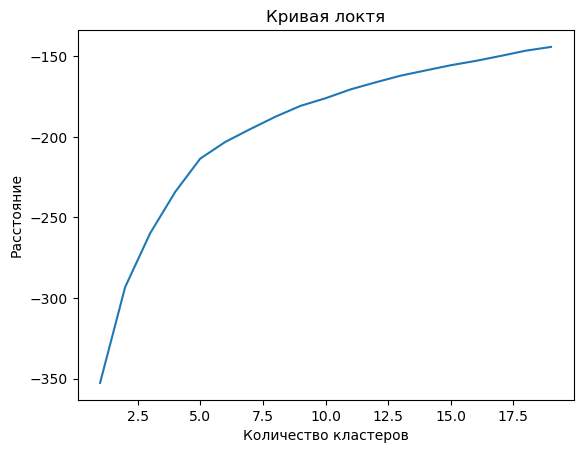

In [23]:
import pylab as pl
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

pl.plot(Nc,score)
pl.xlabel('Количество кластеров')
pl.ylabel('Расстояние')
pl.title('Кривая локтя')
pl.show()

Точка сгиба находится примерно на отметке 5, поэтому далее, в методе кластеризации, мы будем распределять данные на пять кластеров.

Используем алгоритм K-means для пяти кластеров

In [24]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)


KMeans(n_clusters=5)

В результате кластеризации у нас появилась метка кластеризации. 

Поместим эти метки обратно в исходный фрейм числовых данных.

In [25]:
len(kmeans.labels_)

809

In [26]:
df['cluster'] = kmeans.labels_
df.head()

,track_name,artist(s)_name,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,count_in_playlist,cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,141381703.0,125.0,80.0,89,83.0,31,0,8.0,4,641,2
1,LALA,Myke Towers,1,133716286.0,92.0,71.0,61,74.0,7,0,10.0,4,1580,2
2,vampire,Olivia Rodrigo,1,140003974.0,138.0,51.0,32,53.0,17,0,31.0,6,1582,1
3,Cruel Summer,Taylor Swift,1,800840817.0,170.0,55.0,58,72.0,11,0,11.0,15,8099,0
4,WHERE SHE GOES,Bad Bunny,1,303236322.0,144.0,65.0,23,80.0,14,63,11.0,6,3304,1


## Интерпретируем результаты кластеризации

В первую очередь построим гистограмму кластеров, исходя из значения атрибута *streams*, посмотрим на размеры кластеров.

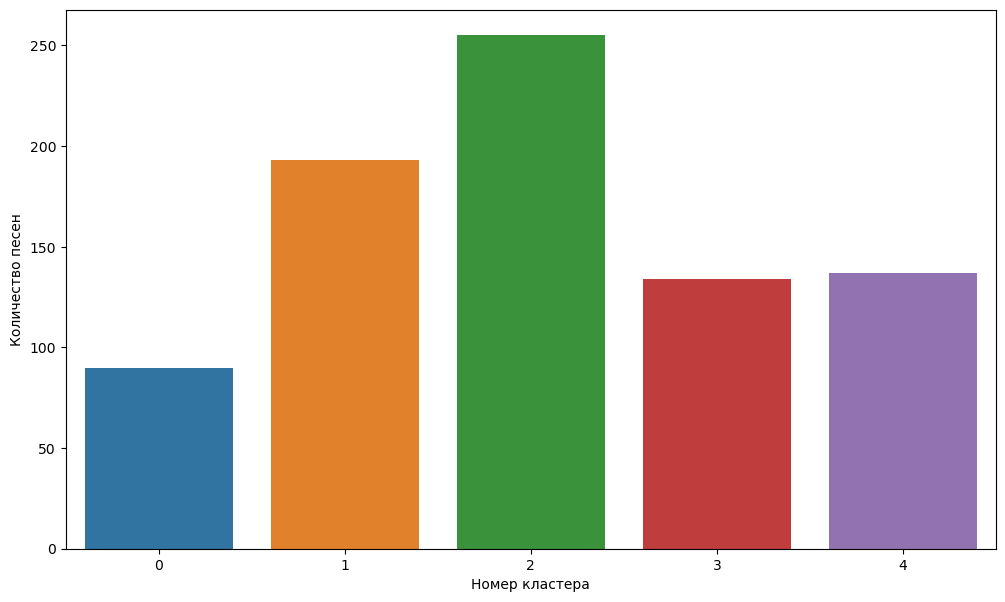

In [28]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df.groupby(['cluster']).count()['streams'].values)
x=axis.set_xlabel("Номер кластера")
x=axis.set_ylabel("Количество песен")

In [30]:
size_array = list(data_new.groupby(['cluster']).count()['streams'].values)
size_array

[90, 193, 255, 134, 137]

Мы видим, что количество элементов в кластерах заметно отличается (кроме кластеров с индексом 3 и 4).
Между наибольшим и наименьши кластером разница в количестве элементов составляет 165 штук.

## Посмотрим на статистику кластеров

In [31]:
# df.groupby(['cluster']).mean()
data_new['cluster'] = kmeans.labels_
data_new.groupby(['cluster']).mean()


,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,count_in_playlist
cluster,,,,,,,,,,,
0,1.400000,1.102064e+09,119.600000,69.566667,51.677778,69.222222,15.166667,1.077778,13.644444,9.188889,15060.733333
1,1.362694,2.858394e+08,128.398964,61.284974,31.119171,66.119171,12.492228,3.492228,13.031088,10.082902,2762.502591
2,1.843137,2.593593e+08,121.839216,77.364706,69.215686,69.501961,21.666667,0.533333,11.239216,12.352941,2121.811765
3,1.246269,3.915545e+08,116.007463,56.000000,37.432836,42.805970,70.119403,2.917910,14.791045,7.873134,3287.358209
4,1.656934,3.368218e+08,121.613139,69.394161,61.416058,70.189781,19.291971,0.605839,33.138686,9.854015,3246.277372


Мы видим, что кластер с индексом 0, который также является самым маленьким, - это кластер музыкальных композиций, которые в среднем имеют больше прослушиваний и вхождений в плейлисты, по сравнению с композициями их других кластеров.

Взглянем на некоторые песни, которые относятся к этому кластеру.

In [33]:
df[df['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,track_name,artist(s)_name,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,count_in_playlist,cluster
505,Need To Know,Doja Cat,1,1.042568e+09,130.0,66.0,19,61.0,30,0,9.0,7,6947,0
495,Pepas,Farruko,1,1.309887e+09,130.0,76.0,44,77.0,1,0,13.0,3,15331,0
106,Dandelions,Ruth B.,1,1.116996e+09,117.0,61.0,45,69.0,2,0,9.0,3,3523,0
173,Why'd You Only Call Me When You're High?,Arctic Monkeys,1,1.267333e+09,92.0,70.0,81,63.0,4,0,8.0,4,24532,0
642,Lost,Frank Ocean,1,8.222397e+08,123.0,91.0,49,61.0,3,0,17.0,22,30210,0


В этом кластере мы видим много известных исполнителей и песен. Таким образом, результаты интуитивно понятны.

Кластер с индексом 3, который является предпоследним по величине кластером в результатах, имеет 2-е место по количеству прослушиваний и попадений в плейлисты.

Посмотрим на некоторые названия композиций из этого кластера.

In [35]:
df[df['cluster']==size_array.index(sorted(size_array)[1])].sample(5)

,track_name,artist(s)_name,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,count_in_playlist,cluster
454,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,4.732483e+08,143.0,60.0,86,32.0,88,0,34.0,6,11117,3
888,Static,Steve Lacy,1,2.024529e+08,79.0,34.0,22,31.0,43,63,10.0,7,1647,3
238,Easy On Me,Adele,1,1.406111e+09,142.0,60.0,13,37.0,58,0,13.0,3,11110,3
783,Crown,Kendrick Lamar,1,4.248557e+07,170.0,37.0,14,24.0,80,0,11.0,4,1505,3
562,Phantom Regret by Jim,The Weeknd,1,3.195957e+07,108.0,46.0,23,48.0,75,30,14.0,4,772,3


Действительно, смотря на значения атрибутов *streams* и *count_in_playlist* можно заметить, что данные композиции всё ещё достаточно популярны, но не так, как песни из третьего кластера.

Наконец, взглянем на наименее успешные музыкальные композиции из кластера с индексом 2.

В этом кластере представлены наименее популярные песни из данной выборки.

In [39]:
df[df['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)

,track_name,artist(s)_name,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,count_in_playlist,cluster
117,VAGABUNDO,"Sebastian Yatra, Manuel Turizo, Beï¿½ï",3,90839753.0,127.0,82.0,89,85.0,4,0,23.0,6,1181,2
895,Lady Mi Amor,Feid,1,53987404.0,93.0,78.0,75,62.0,6,0,15.0,6,335,2
841,En El Radio Un Cochinero,Victor Cibrian,1,164856284.0,154.0,70.0,97,62.0,47,0,10.0,4,520,2
787,Beautiful Girl,Luciano,1,160035717.0,140.0,84.0,61,42.0,31,0,9.0,9,744,2
30,TULUM,"Peso Pluma, Grupo Frontera",2,52294266.0,168.0,56.0,63,87.0,39,0,11.0,5,299,2


Действительно, в этом кластере можно заметить куда меньше известных названий и имён.

Кластер с индексом 2 достаточно велик по размеру, поэтому, при необходимости, мы можем увеличить количество кластеров, что позволит разбить выборку на группы меньшего размера и более равномерно.

# Вывод

В ходе выполнения работы мы познакомились с методом кластеризации K-mean.

Был проведён анализ данных о самых известных песнях 2023 года, перечисленных на Spotify. 

С помощью метода кластеризации песни были распределены на пять кластеров по популярности. Изучив характеристики композиций можно сделать выводы о музыкальных предпочтениях слушателей. Например, при визуальном анализе можно сделать вывод о том, что бОльшей популярностью пользуются композиции с меньшей степенью энергичности (*energy*) и бОльшим темпом ударных инструментов (*bpm*). Также бОльшую известность приобретают одиночные исполнители, по сравнению с группами. Такой вывод можно сделать взгянув на три таблицы нулевого, первого и второго кластеров, в частности на атрибуты *artist_count*, *streams* и *count_in_playlist*.